## Import Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Input Data

In [4]:
data = pd.read_csv('/content/Real_Combine.csv')
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


##Check Null Values

In [5]:
data.isnull().sum()[data.isnull().sum() > 0]

PM 2.5    2
dtype: int64

##The output label PM2.5 has 2 null values.

##Drop NULL Values

In [0]:
data = data.dropna()

In [8]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

## Separate out Independent Features and Dependent Features

In [0]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [10]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [11]:
Y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

## Split the data into Training and Test sets

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

## Check Corelation among the Features

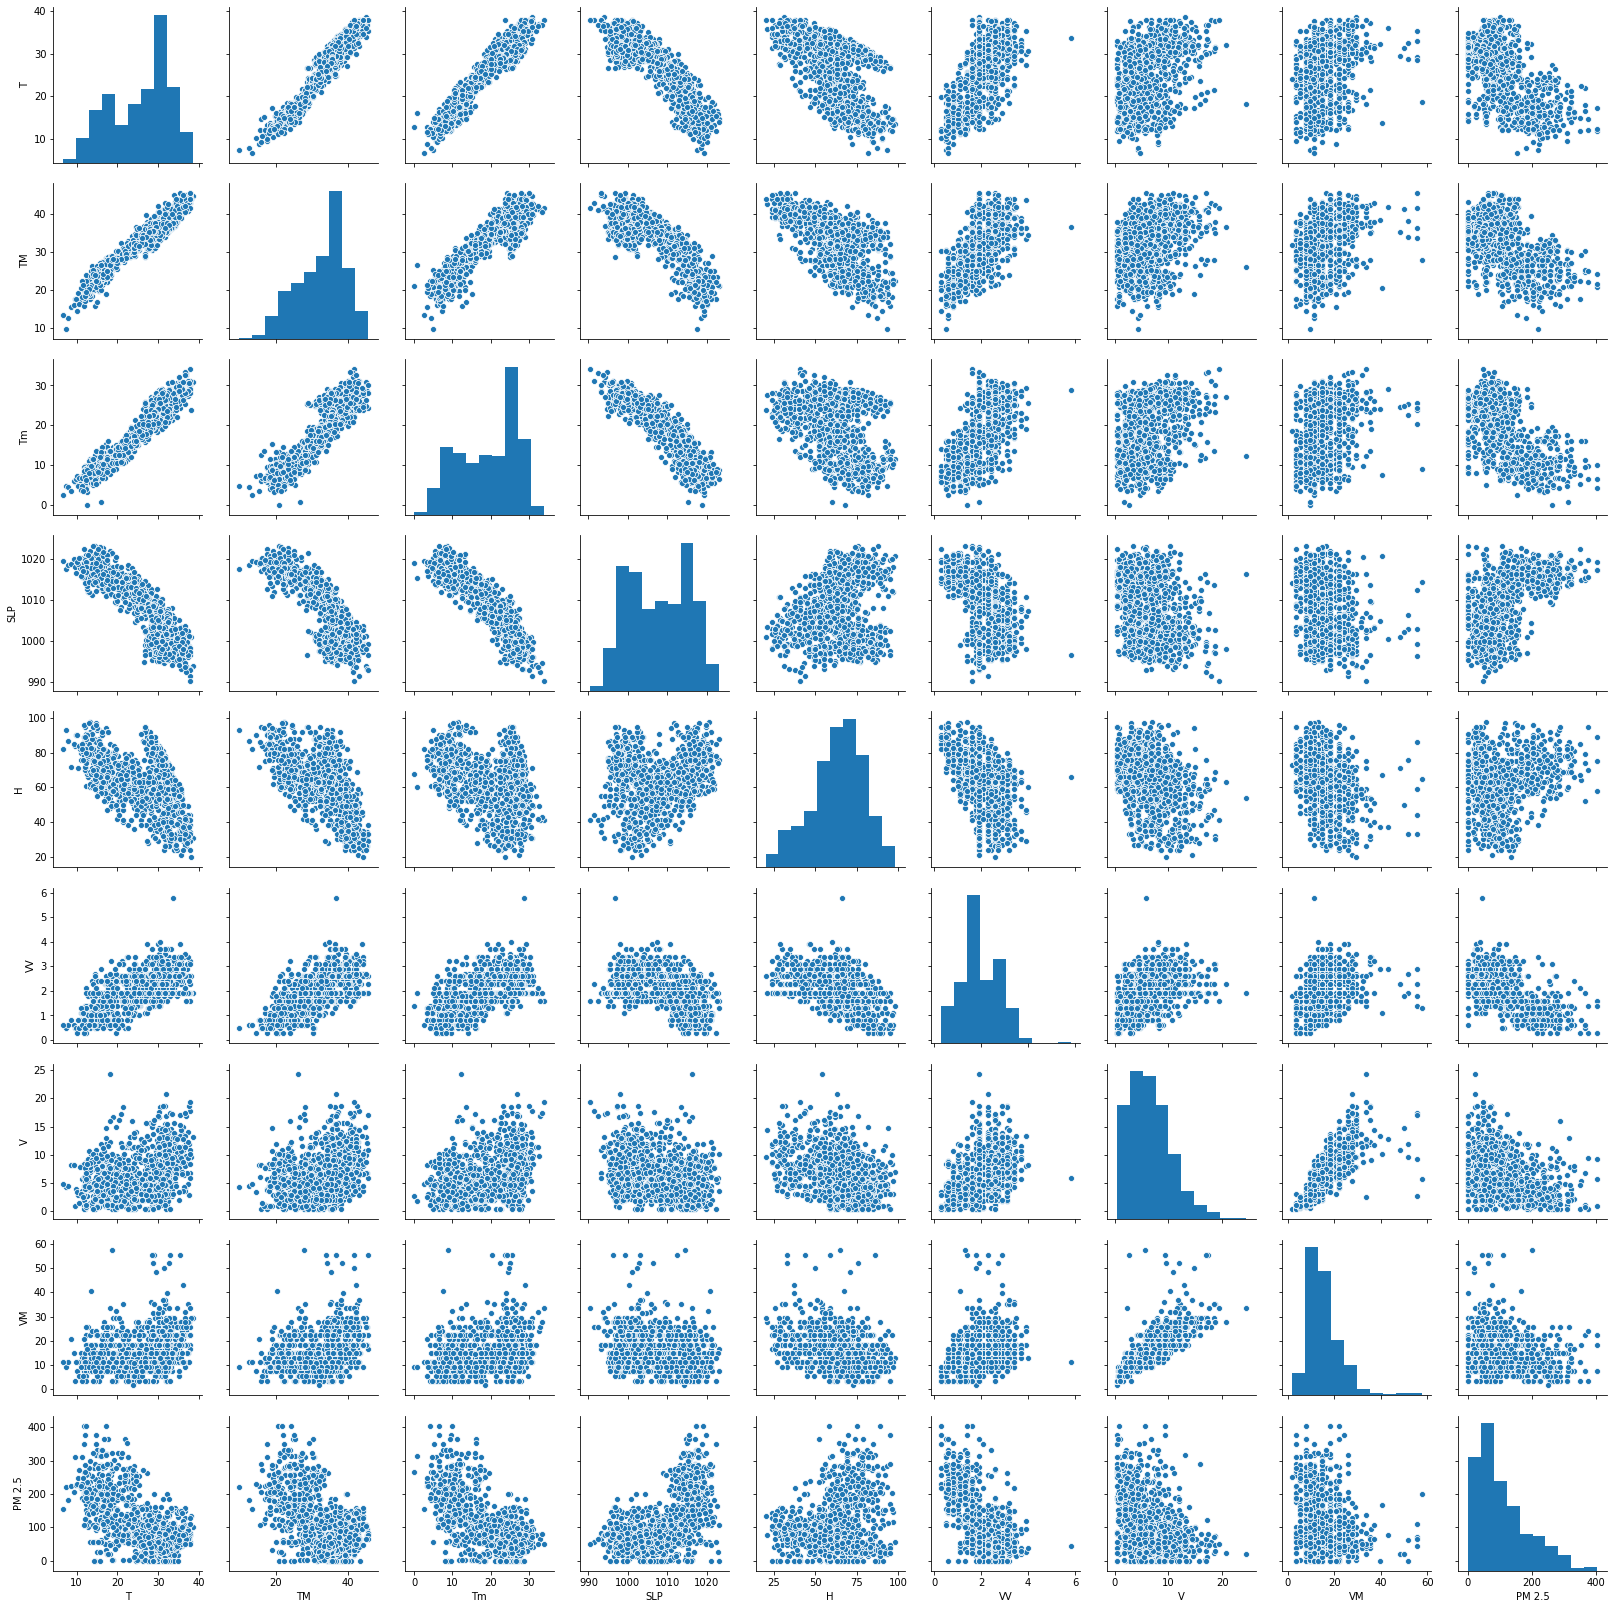

In [13]:
sns.pairplot(data)

##Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library

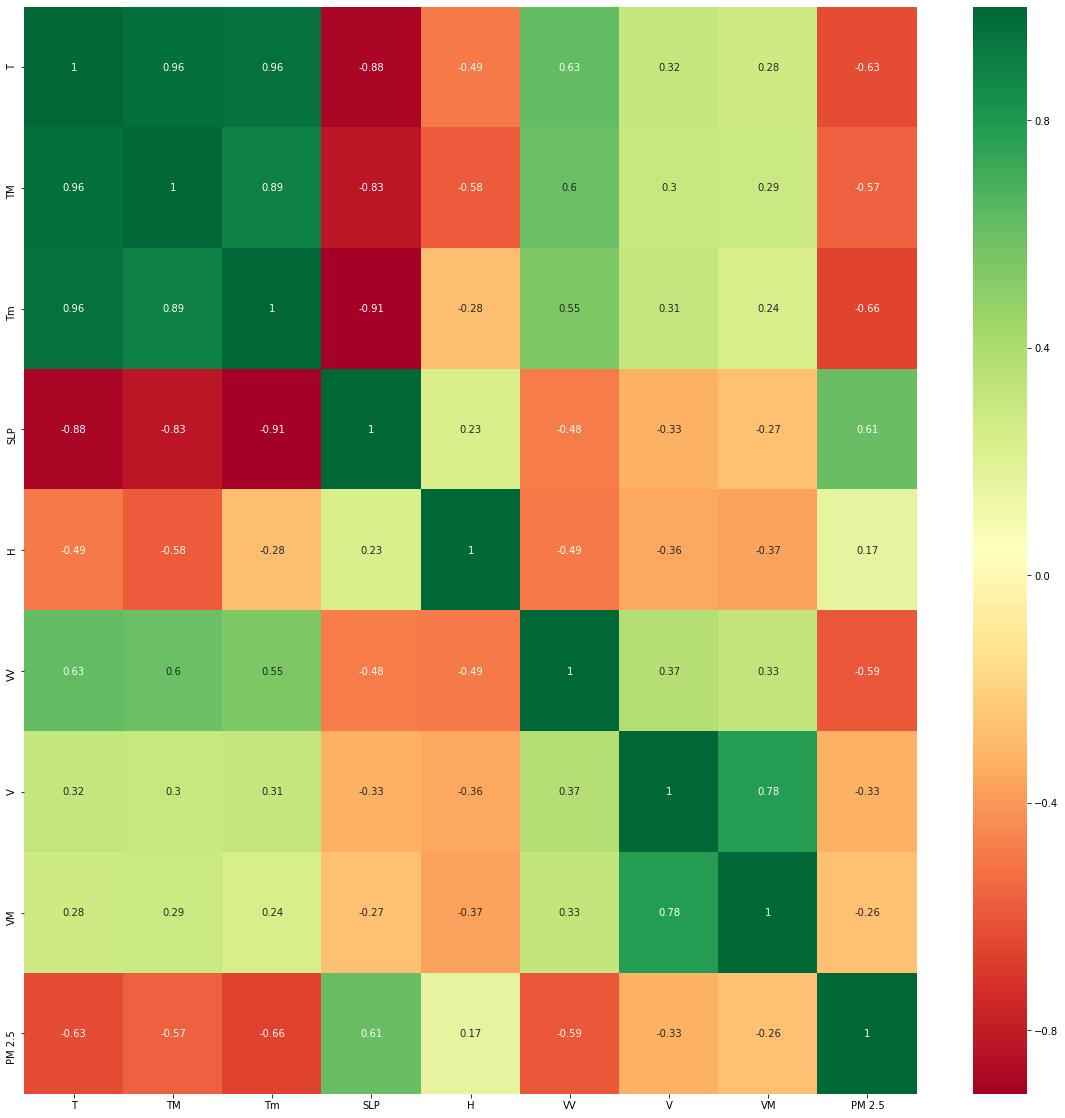

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
top_corr_features 

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

##Comparing Linear Regression, Ridge Regression,Lasso Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)#taking avearge of 5 mean squared error
print(mean_mse)

-3363.347735049972


#### We need to choose that model which has a mean squared coring nearer to 0 as that particular model will perform well

## Implement Ridge Regression - uses L2 Regularization to avoid Overfitting issue

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
## In order to find the optimum value of alpha perform Cross Validation using Grid Search
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [22]:
print(f'Best Optimum value of alpha :{ridge_regressor.best_params_}')

Best Optimum value of alpha :{'alpha': 40}


In [23]:
print(f'Best Score obtained with the crossvalidation step{ridge_regressor.best_score_}')

Best Score obtained with the crossvalidation step-3322.6038297686346


## Implement LASSO Regression -uses L1 Regularization to avoid Overfitting issue

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1340324.347516123, tolerance: 571.8423947559785
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1464257.5680105796, tolerance: 637.5176965354884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1310190.9501466048, tolerance: 585.8126775988607
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1276959.623293

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [26]:
print(f'Best Optimum value of alpha :{lasso_regressor.best_params_}')
print(f'Best Score obtained with the crossvalidation step{lasso_regressor.best_score_}')

Best Optimum value of alpha :{'alpha': 5}
Best Score obtained with the crossvalidation step-3318.648506227279


#### Lasso Regressor gives the best cross validation score,hence using the regressor model for prediction

In [0]:
y_pred = lasso_regressor.predict(X_test)

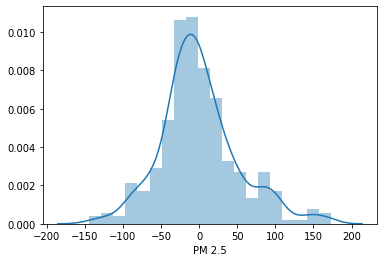

In [29]:
sns.distplot(y_test-y_pred)

##Visualization of the model Performance

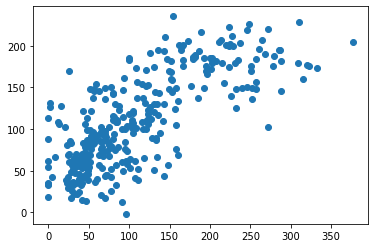

In [30]:
plt.scatter(y_test,y_pred)

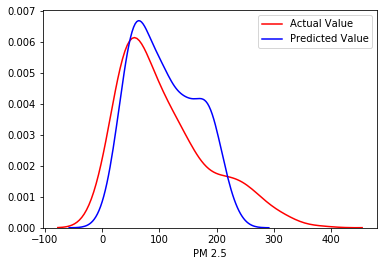

In [31]:
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value')

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- **Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
-RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R squared error : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 38.267734821859094
Mean Squared Error : 2668.504467155259
Root Mean Squared Error : 51.65756931133384
R squared error : 0.5644427017857492


## Save the Model

In [0]:
import pickle
##
file = open('lasso_regression_model.pkl','wb')
#dump information  to that file
pickle.dump(lasso_regressor,file)